In [57]:
import psycopg2
import pandas as pd

In [48]:
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="Space@12345")

In [44]:
def query_result(query, col_list):
    cursor_obj = conn.cursor()
    cursor_obj.execute(query)
    result_df = pd.DataFrame(cursor_obj.fetchall(), columns = col_list) 
    return result_df

## output of 3.8.3 1st part

In [50]:
output_1 = query_result('''with cte as (
    select state_ut, district, year, rape_cases + kidnap_cases as Sum_of_rape_and_kidnap,
    row_number() over(partition by state_ut, year order by rape_cases+kidnap_cases DESC) as row_num
    from crime_against_st
    where district <> 'TOTAL'
)
select state_ut, district, year, Sum_of_rape_and_kidnap
from cte
where row_num = 1''', ['state/ut','district','year','Sum_of_rape_and_kidnap']
)

In [51]:
output_1.head()

,state/ut,district,year,Sum_of_rape_and_kidnap
0,A & N ISLANDS,ANDAMAN,2001,0
1,A & N ISLANDS,NICOBAR,2002,0
2,A & N ISLANDS,ANDAMAN,2003,1
3,A & N ISLANDS,NICOBAR,2004,0
4,A & N ISLANDS,ANDAMAN,2005,1


## output of 3.8.3 part 2

In [52]:
output_2 = query_result('''with cte as (
    select state_ut, district, year, rape_cases + kidnap_cases as Sum_of_rape_and_kidnap,
    row_number() over(partition by state_ut, year order by rape_cases+kidnap_cases DESC) as row_num
    from crime_against_st
    where district <> 'TOTAL'
), 
t as (
    select state_ut, district, year, Sum_of_rape_and_kidnap,
    count(*) over(partition by state_ut, district) as district_count
    from cte 
    where row_num = 1
)
select state_ut, district, year, Sum_of_rape_and_kidnap
from t
where district_count > 2
order by 4 DESC''',['state/ut','district','year','Sum_of_rape_and_kidnap'])

In [53]:
output_2.head()

,state/ut,district,year,Sum_of_rape_and_kidnap
0,MADHYA PRADESH,BETUL,2010,38
1,MADHYA PRADESH,BETUL,2003,34
2,MADHYA PRADESH,BETUL,2006,33
3,MADHYA PRADESH,BETUL,2005,30
4,CHHATTISGARH,JAGDALPUR,2003,28


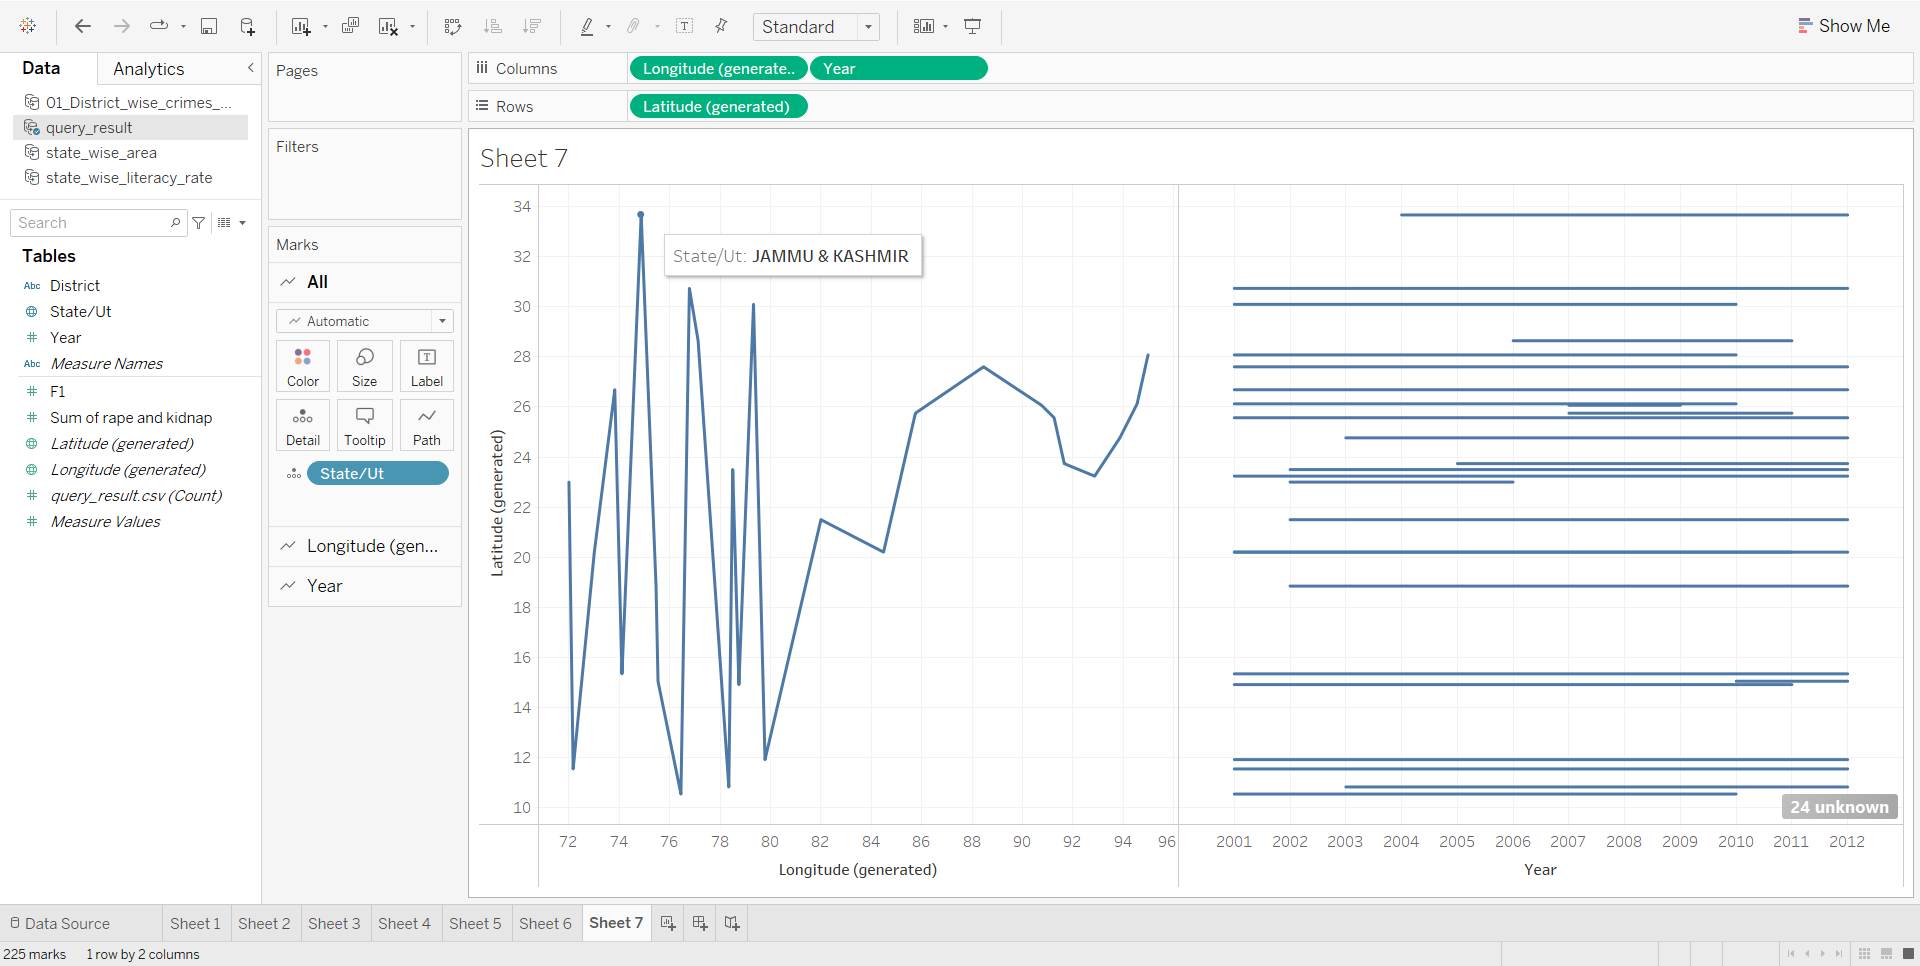

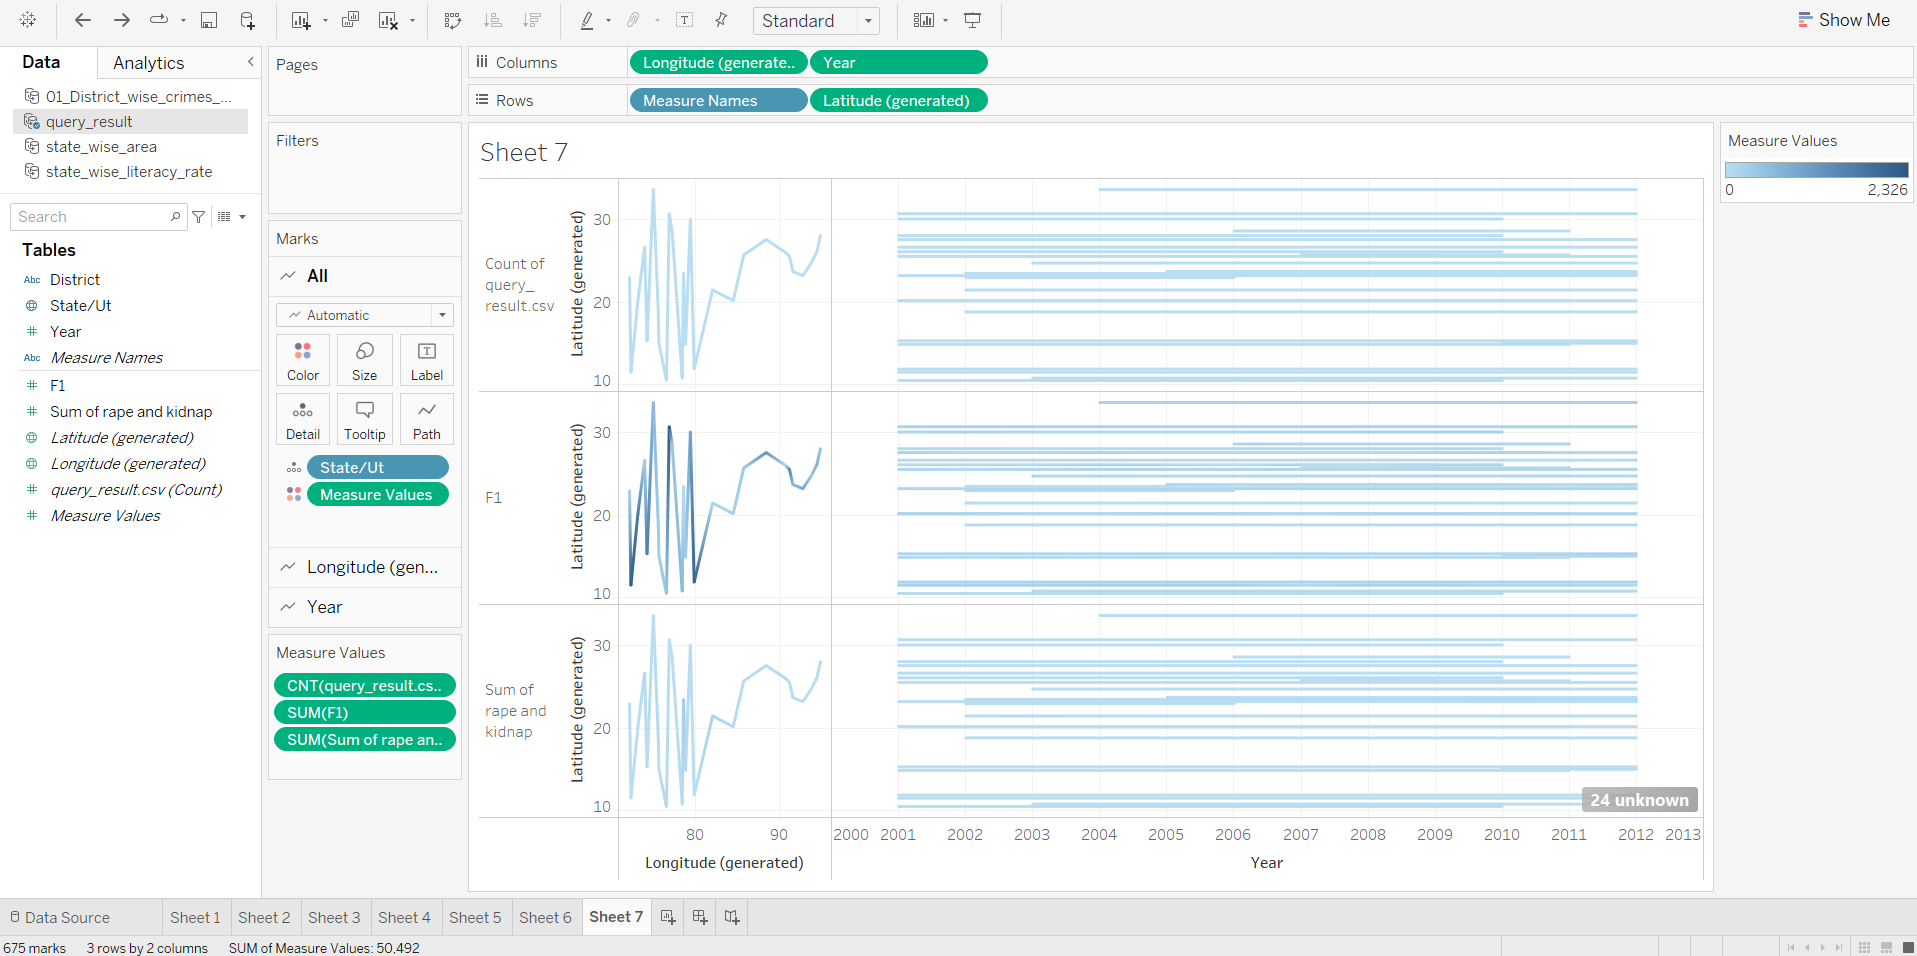

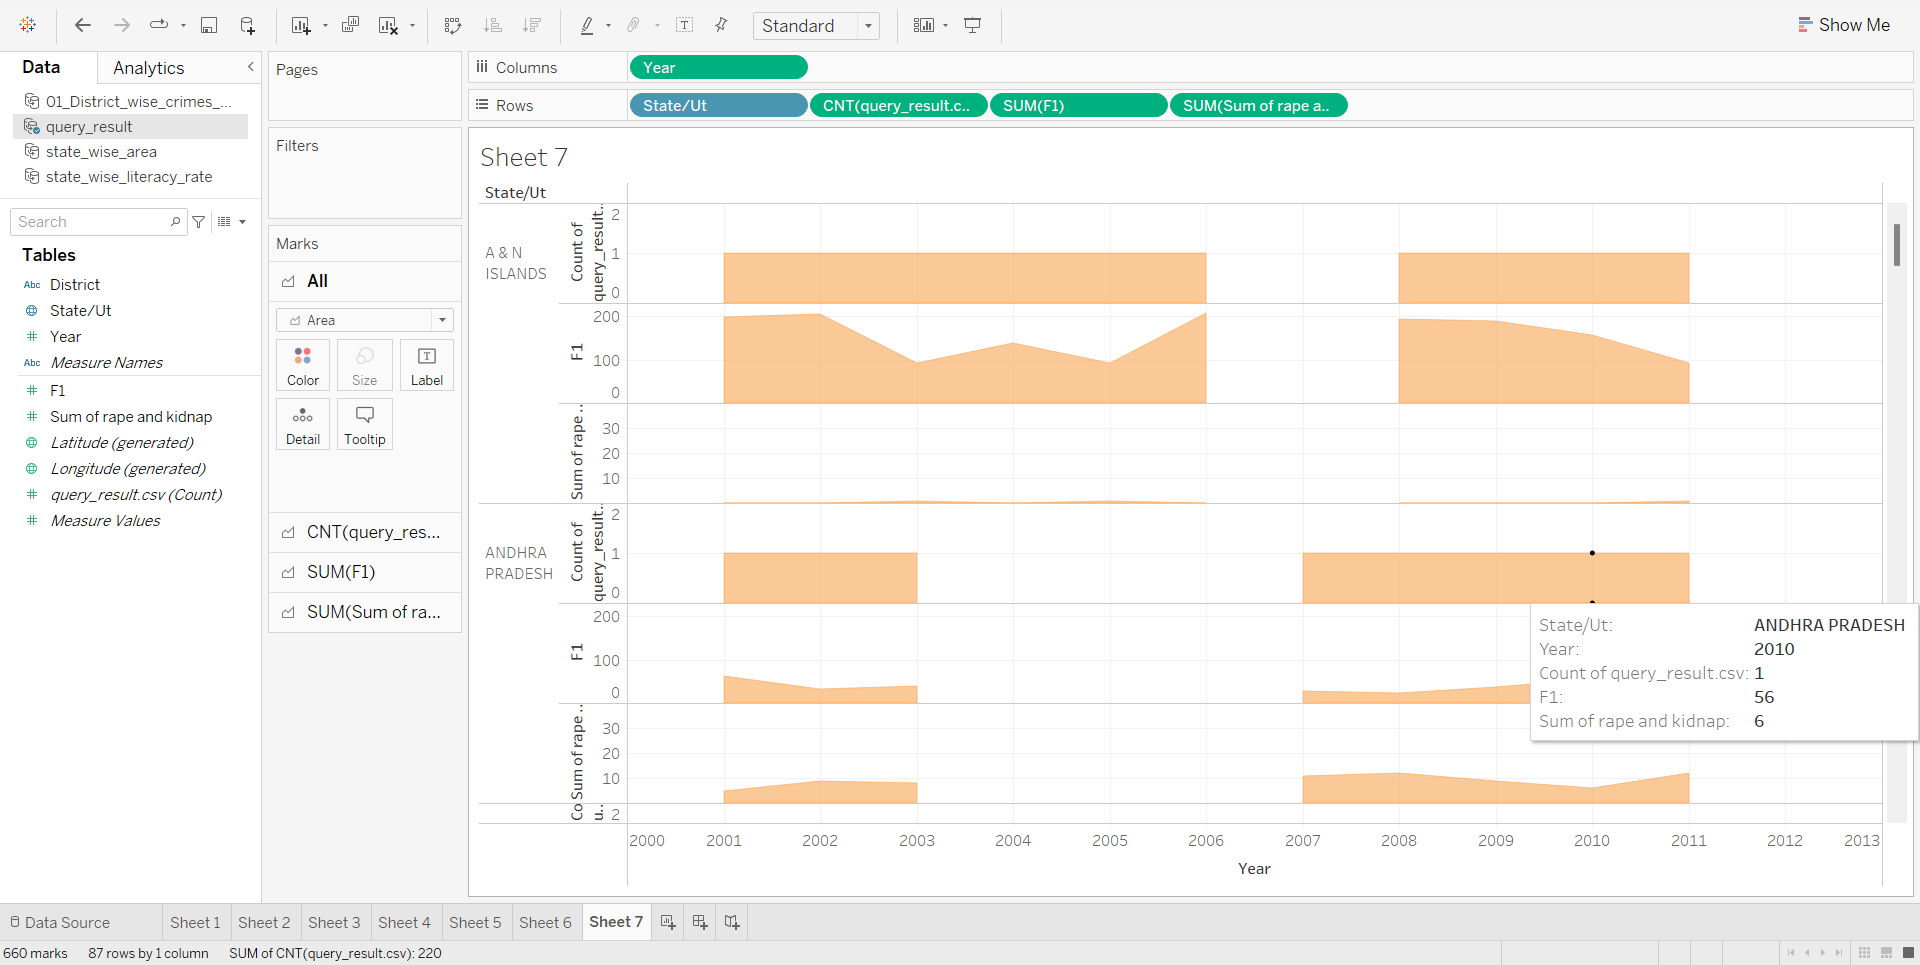